<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

# Data Gathering

In [2]:
df = pd.read_csv("car_dataset.csv")
df.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


# Data Preparation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [6]:
df.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [7]:
df.Transmission .value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [8]:
df.Owner.value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [9]:
# df.drop("Owner", axis = 1, inplace=True)

In [10]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual


In [11]:
df1 = pd.get_dummies(data = df, columns=["Fuel_Type", "Seller_Type", "Transmission"], dtype=("float"))

In [12]:
df1.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,sx4,2013,4.75,9.54,43000,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,ciaz,2017,7.25,9.85,6900,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,wagon r,2011,2.85,4.15,5200,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,swift,2014,4.60,6.87,42450,0.0,1.0,0.0,1.0,0.0,0.0,1.0
5,vitara brezza,2018,9.25,9.83,2071,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6,ciaz,2015,6.75,8.12,18796,0.0,0.0,1.0,1.0,0.0,0.0,1.0
7,s cross,2015,6.50,8.61,33429,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8,ciaz,2016,8.75,8.89,20273,0.0,1.0,0.0,1.0,0.0,0.0,1.0
9,ciaz,2015,7.45,8.92,42367,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Car_Name                301 non-null    object 
 1   Year                    301 non-null    int64  
 2   Selling_Price           301 non-null    float64
 3   Present_Price           301 non-null    float64
 4   Kms_Driven              301 non-null    int64  
 5   Fuel_Type_CNG           301 non-null    float64
 6   Fuel_Type_Diesel        301 non-null    float64
 7   Fuel_Type_Petrol        301 non-null    float64
 8   Seller_Type_Dealer      301 non-null    float64
 9   Seller_Type_Individual  301 non-null    float64
 10  Transmission_Automatic  301 non-null    float64
 11  Transmission_Manual     301 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 28.3+ KB


In [14]:
df1.shape

(301, 12)

In [15]:
df1.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.006645,0.199336,0.794020,0.647841,0.352159,0.132890,0.867110
std,2.891554,5.082812,8.644115,38886.883882,0.081378,0.400166,0.405089,0.478439,0.478439,0.340021,0.340021
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,2018.000000,35.000000,92.600000,500000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df1.Year.value_counts()

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2005     4
2006     4
2003     2
2007     2
2004     1
2018     1
Name: Year, dtype: int64

In [17]:
df1.Car_Name.value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
KTM 390 Duke                 1
Honda Dream Yuga             1
Bajaj Pulsar 135 LS          1
Hero Splender Plus           1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [18]:
df1.Car_Name.nunique()

98

In [19]:
df2 = pd.get_dummies(df1, columns=["Car_Name"], dtype="float")

In [20]:
df2["age"] = 2018- df2.Year
df2.drop("Year", axis = 1, inplace=True)

In [21]:
df2.sample(50)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Car_Name_800,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,Car_Name_Bajaj Avenger 220 dtsi,Car_Name_Bajaj Avenger Street 220,Car_Name_Bajaj Discover 100,Car_Name_Bajaj Discover 125,Car_Name_Bajaj Dominar 400,Car_Name_Bajaj Pulsar NS 200,Car_Name_Bajaj Pulsar 135 LS,Car_Name_Bajaj Pulsar 150,Car_Name_Bajaj Pulsar 220 F,Car_Name_Bajaj Pulsar NS 200,Car_Name_Bajaj Pulsar RS200,Car_Name_Hero CBZ Xtreme,Car_Name_Hero Ignitor Disc,Car_Name_Hero Extreme,Car_Name_Hero Glamour,Car_Name_Hero Honda CBZ extreme,Car_Name_Hero Honda Passion Pro,Car_Name_Hero Hunk,Car_Name_Hero Passion Pro,Car_Name_Hero Passion X pro,Car_Name_Hero Splender Plus,Car_Name_Hero Splender iSmart,Car_Name_Hero Super Splendor,Car_Name_Honda Activa 125,Car_Name_Honda Activa 4G,Car_Name_Honda CB Hornet 160R,Car_Name_Honda CB Shine,Car_Name_Honda CB Trigger,Car_Name_Honda CB Unicorn,Car_Name_Honda CB twister,Car_Name_Honda CBR 150,Car_Name_Honda Dream Yuga,Car_Name_Honda Karizma,...,Car_Name_Royal Enfield Thunder 500,Car_Name_Suzuki Access 125,Car_Name_TVS Apache RTR 160,Car_Name_TVS Apache RTR 180,Car_Name_TVS Jupyter,Car_Name_TVS Sport,Car_Name_TVS Wego,Car_Name_UM Renegade Mojave,Car_Name_Yamaha FZ v 2.0,Car_Name_Yamaha FZ 16,Car_Name_Yamaha FZ S,Car_Name_Yamaha FZ S V 2.0,Car_Name_Yamaha Fazer,Car_Name_alto 800,Car_Name_alto k10,Car_Name_amaze,Car_Name_baleno,Car_Name_brio,Car_Name_camry,Car_Name_ciaz,Car_Name_city,Car_Name_corolla,Car_Name_corolla altis,Car_Name_creta,Car_Name_dzire,Car_Name_elantra,Car_Name_eon,Car_Name_ertiga,Car_Name_etios cross,Car_Name_etios g,Car_Name_etios gd,Car_Name_etios liva,Car_Name_fortuner,Car_Name_grand i10,Car_Name_i10,Car_Name_i20,Car_Name_ignis,Car_Name_innova,Car_Name_jazz,Car_Name_land cruiser,Car_Name_omni,Car_Name_ritz,Car_Name_s cross,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,age
5,9.25,9.830,2071,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
115,1.11,1.470,17500,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
181,0.30,0.480,50000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
24,2.90,4.410,56879,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5
180,0.30,0.510,60000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.

In [22]:
Q1 = df['Kms_Driven'].quantile(0.25)
Q3 = df['Kms_Driven'].quantile(0.75)
IQR = Q3 - Q1
IQR

33767.0

In [23]:
lower_Range = Q1 -(1.5 * IQR)
upper_Range = Q3 + (1.5 * IQR)

In [24]:
lower_Range, upper_Range

(-35650.5, 99417.5)

In [25]:
numerical= df1.drop(['Present_Price'], axis=1).select_dtypes('number').columns

In [26]:
skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = df1[numerical].skew()
skew_cols= skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols

Fuel_Type_CNG             12.206146
Kms_Driven                 6.436013
Selling_Price              2.493422
Transmission_Automatic     2.173776
Fuel_Type_Diesel           1.512750
Year                      -1.246189
Fuel_Type_Petrol          -1.461340
Transmission_Manual       -2.173776
dtype: float64

<AxesSubplot:xlabel='Kms_Driven', ylabel='Count'>

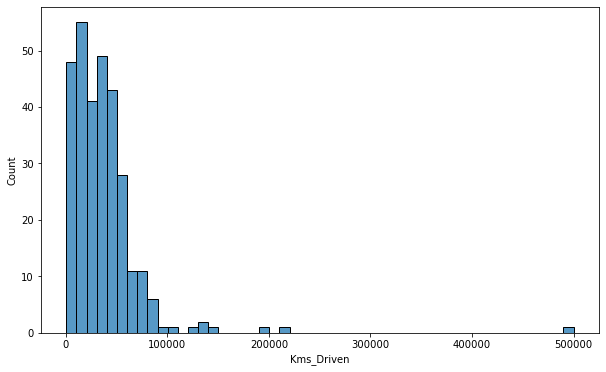

In [27]:
sns.histplot(df2["Kms_Driven"])

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Columns: 109 entries, Selling_Price to age
dtypes: float64(107), int64(2)
memory usage: 256.4 KB


In [29]:
df2.shape

(301, 109)

In [30]:
df2[df2["Kms_Driven"] > 150000]

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Car_Name_800,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,Car_Name_Bajaj Avenger 220 dtsi,Car_Name_Bajaj Avenger Street 220,Car_Name_Bajaj Discover 100,Car_Name_Bajaj Discover 125,Car_Name_Bajaj Dominar 400,Car_Name_Bajaj Pulsar NS 200,Car_Name_Bajaj Pulsar 135 LS,Car_Name_Bajaj Pulsar 150,Car_Name_Bajaj Pulsar 220 F,Car_Name_Bajaj Pulsar NS 200,Car_Name_Bajaj Pulsar RS200,Car_Name_Hero CBZ Xtreme,Car_Name_Hero Ignitor Disc,Car_Name_Hero Extreme,Car_Name_Hero Glamour,Car_Name_Hero Honda CBZ extreme,Car_Name_Hero Honda Passion Pro,Car_Name_Hero Hunk,Car_Name_Hero Passion Pro,Car_Name_Hero Passion X pro,Car_Name_Hero Splender Plus,Car_Name_Hero Splender iSmart,Car_Name_Hero Super Splendor,Car_Name_Honda Activa 125,Car_Name_Honda Activa 4G,Car_Name_Honda CB Hornet 160R,Car_Name_Honda CB Shine,Car_Name_Honda CB Trigger,Car_Name_Honda CB Unicorn,Car_Name_Honda CB twister,Car_Name_Honda CBR 150,Car_Name_Honda Dream Yuga,Car_Name_Honda Karizma,...,Car_Name_Royal Enfield Thunder 500,Car_Name_Suzuki Access 125,Car_Name_TVS Apache RTR 160,Car_Name_TVS Apache RTR 180,Car_Name_TVS Jupyter,Car_Name_TVS Sport,Car_Name_TVS Wego,Car_Name_UM Renegade Mojave,Car_Name_Yamaha FZ v 2.0,Car_Name_Yamaha FZ 16,Car_Name_Yamaha FZ S,Car_Name_Yamaha FZ S V 2.0,Car_Name_Yamaha Fazer,Car_Name_alto 800,Car_Name_alto k10,Car_Name_amaze,Car_Name_baleno,Car_Name_brio,Car_Name_camry,Car_Name_ciaz,Car_Name_city,Car_Name_corolla,Car_Name_corolla altis,Car_Name_creta,Car_Name_dzire,Car_Name_elantra,Car_Name_eon,Car_Name_ertiga,Car_Name_etios cross,Car_Name_etios g,Car_Name_etios gd,Car_Name_etios liva,Car_Name_fortuner,Car_Name_grand i10,Car_Name_i10,Car_Name_i20,Car_Name_ignis,Car_Name_innova,Car_Name_jazz,Car_Name_land cruiser,Car_Name_omni,Car_Name_ritz,Car_Name_s cross,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,age
84,3.49,13.46,197176,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13
179,0.31,1.05,213000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
196,0.17,0.52,500000,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10


In [31]:
df2.drop(df2.index[196], inplace=True)

In [32]:
df2[df2["Kms_Driven"] > 150000]

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Car_Name_800,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,Car_Name_Bajaj Avenger 220 dtsi,Car_Name_Bajaj Avenger Street 220,Car_Name_Bajaj Discover 100,Car_Name_Bajaj Discover 125,Car_Name_Bajaj Dominar 400,Car_Name_Bajaj Pulsar NS 200,Car_Name_Bajaj Pulsar 135 LS,Car_Name_Bajaj Pulsar 150,Car_Name_Bajaj Pulsar 220 F,Car_Name_Bajaj Pulsar NS 200,Car_Name_Bajaj Pulsar RS200,Car_Name_Hero CBZ Xtreme,Car_Name_Hero Ignitor Disc,Car_Name_Hero Extreme,Car_Name_Hero Glamour,Car_Name_Hero Honda CBZ extreme,Car_Name_Hero Honda Passion Pro,Car_Name_Hero Hunk,Car_Name_Hero Passion Pro,Car_Name_Hero Passion X pro,Car_Name_Hero Splender Plus,Car_Name_Hero Splender iSmart,Car_Name_Hero Super Splendor,Car_Name_Honda Activa 125,Car_Name_Honda Activa 4G,Car_Name_Honda CB Hornet 160R,Car_Name_Honda CB Shine,Car_Name_Honda CB Trigger,Car_Name_Honda CB Unicorn,Car_Name_Honda CB twister,Car_Name_Honda CBR 150,Car_Name_Honda Dream Yuga,Car_Name_Honda Karizma,...,Car_Name_Royal Enfield Thunder 500,Car_Name_Suzuki Access 125,Car_Name_TVS Apache RTR 160,Car_Name_TVS Apache RTR 180,Car_Name_TVS Jupyter,Car_Name_TVS Sport,Car_Name_TVS Wego,Car_Name_UM Renegade Mojave,Car_Name_Yamaha FZ v 2.0,Car_Name_Yamaha FZ 16,Car_Name_Yamaha FZ S,Car_Name_Yamaha FZ S V 2.0,Car_Name_Yamaha Fazer,Car_Name_alto 800,Car_Name_alto k10,Car_Name_amaze,Car_Name_baleno,Car_Name_brio,Car_Name_camry,Car_Name_ciaz,Car_Name_city,Car_Name_corolla,Car_Name_corolla altis,Car_Name_creta,Car_Name_dzire,Car_Name_elantra,Car_Name_eon,Car_Name_ertiga,Car_Name_etios cross,Car_Name_etios g,Car_Name_etios gd,Car_Name_etios liva,Car_Name_fortuner,Car_Name_grand i10,Car_Name_i10,Car_Name_i20,Car_Name_ignis,Car_Name_innova,Car_Name_jazz,Car_Name_land cruiser,Car_Name_omni,Car_Name_ritz,Car_Name_s cross,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,age
84,3.49,13.46,197176,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13
179,0.31,1.05,213000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


In [33]:
df2.drop(df2.index[179], inplace=True)

In [34]:
df2[df2["Kms_Driven"] > 150000]

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Car_Name_800,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,Car_Name_Bajaj Avenger 220 dtsi,Car_Name_Bajaj Avenger Street 220,Car_Name_Bajaj Discover 100,Car_Name_Bajaj Discover 125,Car_Name_Bajaj Dominar 400,Car_Name_Bajaj Pulsar NS 200,Car_Name_Bajaj Pulsar 135 LS,Car_Name_Bajaj Pulsar 150,Car_Name_Bajaj Pulsar 220 F,Car_Name_Bajaj Pulsar NS 200,Car_Name_Bajaj Pulsar RS200,Car_Name_Hero CBZ Xtreme,Car_Name_Hero Ignitor Disc,Car_Name_Hero Extreme,Car_Name_Hero Glamour,Car_Name_Hero Honda CBZ extreme,Car_Name_Hero Honda Passion Pro,Car_Name_Hero Hunk,Car_Name_Hero Passion Pro,Car_Name_Hero Passion X pro,Car_Name_Hero Splender Plus,Car_Name_Hero Splender iSmart,Car_Name_Hero Super Splendor,Car_Name_Honda Activa 125,Car_Name_Honda Activa 4G,Car_Name_Honda CB Hornet 160R,Car_Name_Honda CB Shine,Car_Name_Honda CB Trigger,Car_Name_Honda CB Unicorn,Car_Name_Honda CB twister,Car_Name_Honda CBR 150,Car_Name_Honda Dream Yuga,Car_Name_Honda Karizma,...,Car_Name_Royal Enfield Thunder 500,Car_Name_Suzuki Access 125,Car_Name_TVS Apache RTR 160,Car_Name_TVS Apache RTR 180,Car_Name_TVS Jupyter,Car_Name_TVS Sport,Car_Name_TVS Wego,Car_Name_UM Renegade Mojave,Car_Name_Yamaha FZ v 2.0,Car_Name_Yamaha FZ 16,Car_Name_Yamaha FZ S,Car_Name_Yamaha FZ S V 2.0,Car_Name_Yamaha Fazer,Car_Name_alto 800,Car_Name_alto k10,Car_Name_amaze,Car_Name_baleno,Car_Name_brio,Car_Name_camry,Car_Name_ciaz,Car_Name_city,Car_Name_corolla,Car_Name_corolla altis,Car_Name_creta,Car_Name_dzire,Car_Name_elantra,Car_Name_eon,Car_Name_ertiga,Car_Name_etios cross,Car_Name_etios g,Car_Name_etios gd,Car_Name_etios liva,Car_Name_fortuner,Car_Name_grand i10,Car_Name_i10,Car_Name_i20,Car_Name_ignis,Car_Name_innova,Car_Name_jazz,Car_Name_land cruiser,Car_Name_omni,Car_Name_ritz,Car_Name_s cross,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,age
84,3.49,13.46,197176,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13


In [35]:
df2.drop(df2.index[84], inplace=True)

C:\Users\bunya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kms_Driven'>

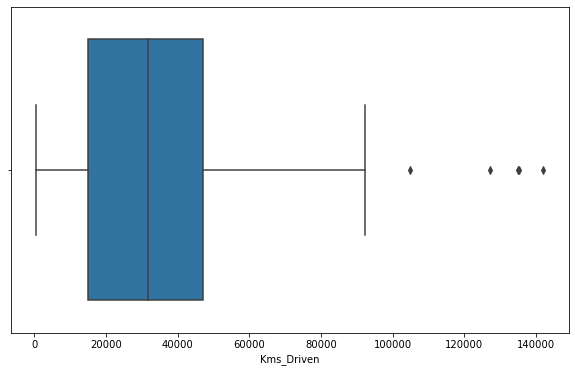

In [36]:
sns.boxplot(df2["Kms_Driven"])

In [37]:
numerical= df2[df2['Selling_Price', "Kms_Driven"]].select_dtypes('number').columns
skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = df1[numerical].skew()
skew_cols= skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols

KeyError: ('Selling_Price', 'Kms_Driven')

In [ ]:
df2.describe()

In [ ]:
sns.boxplot(df2.Selling_Price)

In [ ]:
df2.Selling_Price.value_counts(ascending=True)

In [ ]:
sns.histplot(df2.Selling_Price)

In [ ]:
df2[df2.Selling_Price > 31]

In [ ]:
df2.Present_Price.sort_values()

In [ ]:
sns.histplot(df2.Present_Price)

In [ ]:
df2.Present_Price.describe()

In [ ]:
df2.iloc[86]

In [ ]:
df.iloc[86]

In [ ]:
df[df["Car_Name"] == "land cruiser"]

In [ ]:
df.Car_Name.value_counts()

In [ ]:
# df2.drop(df2.index[86], inplace=True)

In [ ]:
df2.head(3)

In [ ]:
df2Values = df2[[ "age", "Selling_Price", "Present_Price", "Kms_Driven"]]
df2Values

In [ ]:
sns.heatmap(df2Values.corr(), annot = True)

# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


### Features and target variable

In [ ]:
X = df2.drop("Selling_Price", axis = 1)
y = df2["Selling_Price"]

### Splitting data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

##  Model Building (Linear Regression)

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

# Interpret the model

In [ ]:
lm.fit(X_train, y_train)

In [ ]:
y_pred = lm.predict(X_test)

# Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [ ]:
y_train_pred = lm.predict(X_train)

In [ ]:
lm.coef_

In [ ]:
eval_metrics(y_train, y_train_pred)

In [ ]:
eval_metrics(y_test, y_pred)

# Regularization

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score

In [ ]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

In [ ]:
pd.DataFrame(scores, index = range(1, 11))

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

# Ridge

In [ ]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)


In [ ]:
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

In [ ]:
y_train_pred = ridge_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

In [ ]:
ridge_scores = {"ridge_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rs = pd.DataFrame(ridge_scores)
rs

In [ ]:
from sklearn.linear_model import RidgeCV
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

In [ ]:
# model değişkeni üzerine belirtilen alpha_space aralıklarında 10 defa train setlerinde validasyon işlem uyguluyor. 
# En iyi alpha değerini buluyor. ikinci kez validasyona ihtiyaç kalmıyor.
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 10, scoring = "neg_root_mean_squared_error")
ridge_cv_model.fit(X_train, y_train)

In [ ]:
#  bu bizim optimal alpha değerimiz.
ridge_cv_model.alpha_ 

In [ ]:
# burada tekrar alpha değeri vermeye gerek yok zaten model onu taşıyor üzerinde
y_pred = ridge_cv_model.predict(X_test)

In [ ]:
eval_metrics(y_test, y_pred)

In [ ]:
y_train_pred = ridge_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred) 

In [ ]:
ridge_cv_scores = {"ridge_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rcs = pd.DataFrame(ridge_cv_scores)
rcs

# Lasso

In [ ]:
from sklearn.linear_model import Lasso, LassoCV

lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_train, y_train)

In [ ]:
y_train_pred = lasso_model.predict(X_train)

In [ ]:
eval_metrics(y_train, y_train_pred)

In [ ]:
y_pred = lasso_model.predict(X_test)

In [ ]:
eval_metrics(y_test, y_pred)

In [ ]:
lasso_scores = {"lasso_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lss = pd.DataFrame(lasso_scores)
lss

In [ ]:
# parametre olarak alpphas değeri verilmeyip, eps=0.001, n_alphas=100,vb rakamlar verilebilir. 
# itreasyonun artırılması ile ilgili bir hata alınırsa iterasyon artırılabilir

lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter = 100000) 
lasso_cv_model.alpha_

In [ ]:
y_train_pred = lasso_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

In [ ]:
# lasso_cv_model, içinde optimum alpha değeri olduğu için tekrar alphas değeri girilmiyor
y_pred = lasso_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

In [ ]:
lasso_cv_scores = {"lasso_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lcs = pd.DataFrame(lasso_cv_scores)
lcs

## Elastic-Net 

In [ ]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [ ]:
# l1_ratio oranı default olarak 0.5, yani 0.5 olarak lasso dan 0.5 ridge modeleden geliyor
elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)

In [ ]:
elastic_model.l1_ratio

In [ ]:
elastic_model.alpha

In [ ]:
y_train_pred = elastic_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

In [ ]:
y_pred = elastic_model.predict(X_test)
eval_metrics(y_test, y_pred)

In [ ]:
elastic_scores = {"elastic_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
es = pd.DataFrame(elastic_scores)
es

In [ ]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], cv = 10, max_iter = 100000)

In [ ]:
elastic_cv_model.fit(X_train, y_train)

In [ ]:
elastic_cv_model.alpha_

In [ ]:
elastic_cv_model.l1_ratio_

In [ ]:
elastic_cv_model.coef_

In [ ]:
y_train_pred = elastic_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

In [ ]:
y_pred = elastic_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

In [ ]:
elastic_cv_scores = {"elastic_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ecs = pd.DataFrame(elastic_cv_scores)
ecs

In [ ]:
numerical= df1.drop(['price'], axis=1).select_dtypes('number').columns

categorical = df1.select_dtypes('object').columns


In [ ]:
df1[numerical].iplot(kind='histogram',subplots=True,bins=50)


In [ ]:
df1[numerical].iplot(kind='hist')

In [ ]:
skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = df1[numerical].skew()
skew_cols= skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols


In [ ]:
df_try = df1.copy()

for col in skew_cols.index.values:
    df_try[col] = df_try[col].apply(np.log1p) # verieri normal dağıtıma yaklaştırmak için

df_try[skew_cols.index].iplot(kind='histogram',subplots=True,bins=50);

In [ ]:
df_trans = df1[skew_cols.index].copy()
pt = PowerTransformer(method='yeo-johnson') # verieri norma dağıtıma yaklaştırmak için
trans= pt.fit_transform(df_trans)
# convert the array back to a dataframe
df_trans = pd.DataFrame(trans, columns =skew_cols.index )
# histograms of the variables
print(df_trans.skew())
df_trans.iplot(kind='hist');


In [ ]:
numerical1= df1.select_dtypes('number').columns


matrix = np.triu(df1[numerical1].corr())
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap (df1[numerical1].corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm',mask=matrix, ax=ax);

In [ ]:
df2 = pd.get_dummies(df1, columns=categorical, drop_first=True)


In [ ]:
rmse_vals =[]
r2_train = []
r2_vals =[]
model_names =[]

X= df2.drop('price', axis=1)
y= df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


lr = LinearRegression()
rr = Ridge()
elastic= ElasticNet()
lassor = Lasso()

models = [lr,rr,lassor,elastic]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_vals.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_train.append (model.score(X_train,y_train))
    r2_vals.append(r2_score(y_test, y_pred))
    sns.distplot((y_test-y_pred),bins=50)
    (y_test-y_pred).iplot(kind='hist')
    print (f'model : {model} and  rmse score is : {np.sqrt(mean_squared_error(y_test, y_pred))}, r2 score is {r2_score(y_test, y_pred)}')
    
    

model_names = ['LinearRegression','Ridge','Lasso','ElasticNet']
result_df = pd.DataFrame({'RMSE':rmse_vals,'R2_Train':r2_train, 'R2_Test':r2_vals}, index=model_names)
result_df


In [ ]:
rmse_vals =[]
r2_train = []
r2_vals =[]
model_names =[]
X= df2.drop('price', axis=1)
y= df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
s = StandardScaler()
p= PowerTransformer(method='yeo-johnson', standardize=True)
lr = LinearRegression()
rr = Ridge()
elastic= ElasticNet()
lassor = Lasso()

In [ ]:
rmse_vals =[]
r2_train = []
r2_vals =[]
model_names =[]
X= df2.drop('price', axis=1)
y= df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
s = StandardScaler()
p= PowerTransformer(method='yeo-johnson', standardize=True)
lr = LinearRegression()
rr = Ridge()
elastic= ElasticNet()
lassor = Lasso()
models = [lr,rr,lassor,elastic]
for model in models:
    ct = make_column_transformer((p,skew_cols.index),remainder='passthrough')
    pipe = make_pipeline(ct, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    rmse_vals.append(round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
    r2_vals.append(round(r2_score(y_test, y_pred),2))
    sns.distplot((y_test-y_pred),bins=50)
    (y_test-y_pred).iplot(kind='hist')
    print (f'model : {model} and  rmse score is : {np.sqrt(mean_squared_error(y_test, y_pred))}, r2 score is {round(r2_score(y_test, y_pred),2)}')
print(rmse_vals)
model_names = ['LinearRegression','Ridge','Lasso','ElasticNet']
result
